In [26]:
import pandas as pd


from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,  mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict


from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler

import lightgbm
print(lightgbm.__version__)

import xgboost
print(xgboost.__version__)


2.3.0
0.90


In [27]:
#importing datasets
train_dataset = pd.read_csv('feature_engineered_train_dataset.csv', header=0) #, header=0, parse_dates=['datetime']
train_dataset = train_dataset.drop(labels= 'Unnamed: 0' , axis=1)
train_dataset.head()

year  month  day  day_of_week  day_of_year  quarter  hour  minute  second  \
0  2019      3   28            3           87        1     0      43       9   
1  2019      3   13            2           72        1     3      58       5   
2  2019      3   12            1           71        1     1      38       5   
3  2019      3   27            2           86        1    11      33       9   
4  2019     10    3            3          276        4    10      43       9   

       temp       cond        do       turb      chl-a  
0  30.67318   94.64645  7.890586   34.89499  329.58420  
1  29.37799   88.46648  2.994163   28.22379   75.43412  
2  29.63066   87.79338  3.759133   27.81244   61.83861  
3  30.25711   94.01340  7.265454   59.38213  328.57310  
4  28.85477  113.77930  5.524088  111.27610  738.35680

In [28]:
#importing datasets
test_dataset = pd.read_csv('feature_engineered_test_dataset.csv', header=0) #, header=0, parse_dates=['datetime']
test_dataset = test_dataset.drop(labels= 'Unnamed: 0' , axis=1)
test_dataset.head()

year  month  day  day_of_week  day_of_year  quarter  hour  minute  second  \
0  2019      2   20            2           51        1    12       0       0   
1  2019      2   20            2           51        1    12      10       0   
2  2019      2   20            2           51        1    12      20       0   
3  2019      2   20            2           51        1    12      40       0   
4  2019      2   20            2           51        1    14      40       0   

       temp      cond        do      turb     chl-a  
0  29.55674  92.12651  6.491213  32.86783  39.64875  
1  29.59175  92.22813  6.724226  24.30492  40.57396  
2  29.57693  91.93182  6.677357  47.46174  40.88269  
3  29.64378  92.78736  7.629431  26.58170  47.05107  
4  29.67038  91.74003  8.935707  40.49232  59.39921

In [29]:
#Preparing Input Features and Prediction Labels

train_X = train_dataset.iloc[:,0:13]
print(train_X.shape)
train_Y = train_dataset.iloc[:, 13]
print(train_Y.shape)

test_X = test_dataset.iloc[:,0:13]
print(test_X.shape)
test_Y = test_dataset.iloc[:, 13]
print(test_Y.shape)

(6813, 13)
(6813,)
(1703, 13)
(1703,)


In [30]:
#Preprocessing with MaxAbsScaler

MAScaler = MaxAbsScaler()
train_X_MaxAbs = MAScaler.fit_transform(train_X)

test_X_MaxAbs = MAScaler.fit_transform(test_X)

print(train_X_MaxAbs.shape)
print(test_X_MaxAbs.shape)

(6813, 13)
(1703, 13)


In [31]:
#Preprocessing with MinMaxScaler
MMScaler = MinMaxScaler(feature_range=(-1,1))
train_X_MinMax = MMScaler.fit_transform(train_X)
test_X_MinMax = MMScaler.fit_transform(test_X)


In [34]:
print(train_X_MinMax.shape)
print(test_X_MinMax.shape)

print(test_X_MinMax)

(6813, 13)
(1703, 13)
[[-1.         -1.          0.26666667 ... -0.24309714 -0.03981183
  -0.82808068]
 [-1.         -1.          0.26666667 ... -0.23932055 -0.0032416
  -0.89348995]
 [-1.         -1.          0.26666667 ... -0.25033257 -0.01059746
  -0.71660259]
 ...
 [-1.          1.         -0.6        ...  0.59411867 -0.2819602
   0.43978589]
 [-1.          1.         -0.6        ...  0.61285297 -0.2388256
   0.48815473]
 [-1.          1.         -0.53333333 ...  0.61863938 -0.00231736
   0.75156594]]


# LightGBM w MaxAbsScaler

In [41]:
#Model Training

model = LGBMRegressor() #min_data_in_leaf= 20


cv = RepeatedKFold(n_splits=10, n_repeats=3)
n_scores = cross_val_score(model, train_X_MaxAbs, train_Y, scoring='neg_root_mean_squared_error', cv=cv) #try:neg_mean_absolute_error 
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



model.fit(train_X_MaxAbs, train_Y)






MAE: -27.593 (1.739)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
#Assessing the performance metrics

yhat_train = model.predict(train_X_MaxAbs)
yhat_test = model.predict(test_X_MaxAbs)

#Print Performance Metrics for Train
print('Train R2: %f' % (r2_score(train_Y, yhat_train)))
print('Train MAE: %f' % (mean_absolute_error(train_Y, yhat_train)))
print('Train RMSE: %f' % (mean_squared_error(train_Y, yhat_train, squared=False))) 


#Print Performance Metrics for Test
print('Test R2: %f' % (r2_score(test_Y, yhat_test)))
print('Test MAE: %f' % (mean_absolute_error(test_Y, yhat_test)))
print('Test RMSE: %f' % (mean_squared_error(test_Y, yhat_test, squared=False))) 


Train R2: 0.995355
Train MAE: 10.561939
Train RMSE: 18.155827
Test R2: 0.922348
Test MAE: 28.101163
Test RMSE: 71.028762


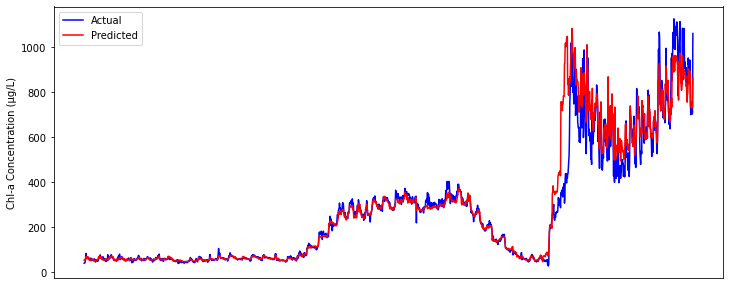

In [43]:
#Plotting the predicted vs actual on test set

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(test_Y, color='blue', label = 'Actual')

plt.plot(yhat_test, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# RF with MinMax

In [44]:
#Model Training

model = RandomForestRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3)
n_scores = cross_val_score(model, train_X_MinMax, train_Y, scoring='neg_root_mean_squared_error', cv=cv) #try:neg_mean_absolute_error 
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


model.fit(train_X_MinMax, train_Y)

MAE: -28.272 (3.036)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
#Assessing the performance metrics

yhat_train = model.predict(train_X_MinMax)
yhat_test = model.predict(test_X_MinMax)

#Print Performance Metrics for Train
print('Train R2: %f' % (r2_score(train_Y, yhat_train)))
print('Train MAE: %f' % (mean_absolute_error(train_Y, yhat_train)))
print('Train RMSE: %f' % (mean_squared_error(train_Y, yhat_train, squared=False))) 


#Print Performance Metrics for Test
print('Test R2: %f' % (r2_score(test_Y, yhat_test)))
print('Test MAE: %f' % (mean_absolute_error(test_Y, yhat_test)))
print('Test RMSE: %f' % (mean_squared_error(test_Y, yhat_test, squared=False))) 


Train R2: 0.998456
Train MAE: 4.892936
Train RMSE: 10.469093
Test R2: 0.928315
Test MAE: 26.520661
Test RMSE: 68.245324


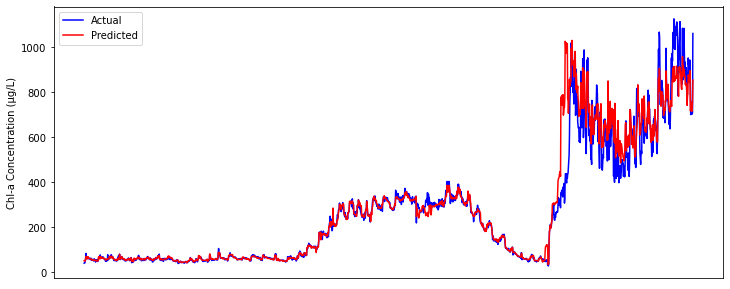

In [46]:
#Plotting the predicted vs actual on test set

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(test_Y, color='blue', label = 'Actual')

plt.plot(yhat_test, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# XGBoost with MaxAbsScaler

In [47]:
#Model Training

model = XGBRegressor(tree_method= 'auto')

cv = RepeatedKFold(n_splits=10, n_repeats=3)
n_scores = cross_val_score(model, train_X_MaxAbs, train_Y, scoring='neg_root_mean_squared_error', cv=cv) #try:neg_mean_absolute_error 
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


model.fit(train_X_MaxAbs, train_Y)

C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:32:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: -39.252 (2.563)
[10:32:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Pollock\anaconda3\envs\gpu_2\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='auto', verbosity=1)

In [48]:
#Assessing the performance metrics

yhat_train = model.predict(train_X_MaxAbs)
yhat_test = model.predict(test_X_MaxAbs)

#Print Performance Metrics for Train
print('Train R2: %f' % (r2_score(train_Y, yhat_train)))
print('Train MAE: %f' % (mean_absolute_error(train_Y, yhat_train)))
print('Train RMSE: %f' % (mean_squared_error(train_Y, yhat_train, squared=False))) 


#Print Performance Metrics for Test
print('Test R2: %f' % (r2_score(test_Y, yhat_test)))
print('Test MAE: %f' % (mean_absolute_error(test_Y, yhat_test)))
print('Test RMSE: %f' % (mean_squared_error(test_Y, yhat_test, squared=False))) 


Train R2: 0.981824
Train MAE: 20.162734
Train RMSE: 35.915016
Test R2: 0.911850
Test MAE: 32.513675
Test RMSE: 75.677690


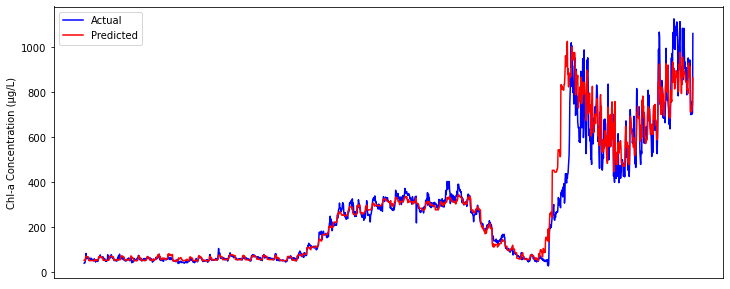

In [49]:
#Plotting the predicted vs actual on test set

plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(test_Y, color='blue', label = 'Actual')

plt.plot(yhat_test, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()